In [1]:
import numpy as np
from numpy import ndarray
from polars import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from data_loader import load_data
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
load_data("shivachandel/kc-house-data", "../Data")
df = pl.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


## Data exploration

In [3]:
df.head()

shape: (5, 21)
┌────────────┬────────────┬──────────┬──────────┬───┬─────────┬──────────┬────────────┬────────────┐
│ id         ┆ date       ┆ price    ┆ bedrooms ┆ … ┆ lat     ┆ long     ┆ sqft_livin ┆ sqft_lot15 │
│ ---        ┆ ---        ┆ ---      ┆ ---      ┆   ┆ ---     ┆ ---      ┆ g15        ┆ ---        │
│ i64        ┆ str        ┆ f64      ┆ i64      ┆   ┆ f64     ┆ f64      ┆ ---        ┆ i64        │
│            ┆            ┆          ┆          ┆   ┆         ┆          ┆ i64        ┆            │
╞════════════╪════════════╪══════════╪══════════╪═══╪═════════╪══════════╪════════════╪════════════╡
│ 7129300520 ┆ 20141013T0 ┆ 221900.0 ┆ 3        ┆ … ┆ 47.5112 ┆ -122.257 ┆ 1340       ┆ 5650       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 6414100192 ┆ 20141209T0 ┆ 538000.0 ┆ 3        ┆ … ┆ 47.721  ┆ -122.319 ┆ 1690       ┆ 7639       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 5631500400 ┆ 20150225T0 ┆ 180000.0 ┆ 2        ┆ … ┆ 47.7379 ┆ -122.233 ┆ 2720       ┆ 8062       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 2487200875 ┆ 20141209T0 ┆ 604000.0 ┆ 4        ┆ … ┆ 47.5208 ┆ -122.393 ┆ 1360       ┆ 5000       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 1954400510 ┆ 20150218T0 ┆ 510000.0 ┆ 3        ┆ … ┆ 47.6168 ┆ -122.045 ┆ 1800       ┆ 7503       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
└────────────┴────────────┴──────────┴──────────┴───┴─────────┴──────────┴────────────┴────────────┘

In [4]:
df.describe()

shape: (9, 22)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ id        ┆ date      ┆ price     ┆ … ┆ lat       ┆ long      ┆ sqft_livi ┆ sqft_lot │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ng15      ┆ 15       │
│ str       ┆ f64       ┆ str       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 21613.0   ┆ 21613     ┆ 21613.0   ┆ … ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   ┆ 21613.0  │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 4.5803e9  ┆ null      ┆ 540088.14 ┆ … ┆ 47.560053 ┆ -122.2138 ┆ 1986.5524 ┆ 12768.45 │
│           ┆           ┆           ┆ 1767      ┆   ┆           ┆ 96        ┆ 92        ┆ 5652     │
│ std       ┆ 2.8766e9  ┆ null      ┆ 367127.19 ┆ … ┆ 0.138564  ┆ 0.140828  ┆ 685.39130 ┆ 27304.17 │
│           ┆           ┆           ┆ 6483      ┆   ┆           ┆           ┆ 4         ┆ 9631     │
│ min       ┆ 1.000102e ┆ 20140502T ┆ 75000.0   ┆ … ┆ 47.1559   ┆ -122.519  ┆ 399.0     ┆ 651.0    │
│           ┆ 6         ┆ 000000    ┆           ┆   ┆           ┆           ┆           ┆          │
│ 25%       ┆ 2.1230e9  ┆ null      ┆ 321950.0  ┆ … ┆ 47.471    ┆ -122.328  ┆ 1490.0    ┆ 5100.0   │
│ 50%       ┆ 3.9049e9  ┆ null      ┆ 450000.0  ┆ … ┆ 47.5718   ┆ -122.23   ┆ 1840.0    ┆ 7620.0   │
│ 75%       ┆ 7.3089e9  ┆ null      ┆ 645000.0  ┆ … ┆ 47.678    ┆ -122.125  ┆ 2360.0    ┆ 10083.0  │
│ max       ┆ 9.9000e9  ┆ 20150527T ┆ 7.7e6     ┆ … ┆ 47.7776   ┆ -121.315  ┆ 6210.0    ┆ 871200.0 │
│           ┆           ┆ 000000    ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [5]:
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y%m%dT%H%M%S"))
df = df.with_columns(pl.col("sqft_above").fill_null(strategy="mean"))

In [6]:
df.head()

shape: (5, 21)
┌────────────┬────────────┬──────────┬──────────┬───┬─────────┬──────────┬────────────┬────────────┐
│ id         ┆ date       ┆ price    ┆ bedrooms ┆ … ┆ lat     ┆ long     ┆ sqft_livin ┆ sqft_lot15 │
│ ---        ┆ ---        ┆ ---      ┆ ---      ┆   ┆ ---     ┆ ---      ┆ g15        ┆ ---        │
│ i64        ┆ date       ┆ f64      ┆ i64      ┆   ┆ f64     ┆ f64      ┆ ---        ┆ i64        │
│            ┆            ┆          ┆          ┆   ┆         ┆          ┆ i64        ┆            │
╞════════════╪════════════╪══════════╪══════════╪═══╪═════════╪══════════╪════════════╪════════════╡
│ 7129300520 ┆ 2014-10-13 ┆ 221900.0 ┆ 3        ┆ … ┆ 47.5112 ┆ -122.257 ┆ 1340       ┆ 5650       │
│ 6414100192 ┆ 2014-12-09 ┆ 538000.0 ┆ 3        ┆ … ┆ 47.721  ┆ -122.319 ┆ 1690       ┆ 7639       │
│ 5631500400 ┆ 2015-02-25 ┆ 180000.0 ┆ 2        ┆ … ┆ 47.7379 ┆ -122.233 ┆ 2720       ┆ 8062       │
│ 2487200875 ┆ 2014-12-09 ┆ 604000.0 ┆ 4        ┆ … ┆ 47.5208 ┆ -122.393 ┆ 1360       ┆ 5000       │
│ 1954400510 ┆ 2015-02-18 ┆ 510000.0 ┆ 3        ┆ … ┆ 47.6168 ┆ -122.045 ┆ 1800       ┆ 7503       │
└────────────┴────────────┴──────────┴──────────┴───┴─────────┴──────────┴────────────┴────────────┘

In [7]:
df = df.drop(["id"])
df.describe()

shape: (9, 21)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ statistic ┆ date      ┆ price     ┆ bedrooms ┆ … ┆ lat       ┆ long      ┆ sqft_livi ┆ sqft_lot1 │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ng15      ┆ 5         │
│ str       ┆ str       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---       │
│           ┆           ┆           ┆          ┆   ┆           ┆           ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 21613     ┆ 21613.0   ┆ 21613.0  ┆ … ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   │
│ null_coun ┆ 0         ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ mean      ┆ 2014-10-2 ┆ 540088.14 ┆ 3.370842 ┆ … ┆ 47.560053 ┆ -122.2138 ┆ 1986.5524 ┆ 12768.455 │
│           ┆ 9 04:38:0 ┆ 1767      ┆          ┆   ┆           ┆ 96        ┆ 92        ┆ 652       │
│           ┆ 1.959000  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ std       ┆ null      ┆ 367127.19 ┆ 0.930062 ┆ … ┆ 0.138564  ┆ 0.140828  ┆ 685.39130 ┆ 27304.179 │
│           ┆           ┆ 6483      ┆          ┆   ┆           ┆           ┆ 4         ┆ 631       │
│ min       ┆ 2014-05-0 ┆ 75000.0   ┆ 0.0      ┆ … ┆ 47.1559   ┆ -122.519  ┆ 399.0     ┆ 651.0     │
│           ┆ 2         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 25%       ┆ 2014-07-2 ┆ 321950.0  ┆ 3.0      ┆ … ┆ 47.471    ┆ -122.328  ┆ 1490.0    ┆ 5100.0    │
│           ┆ 2         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 50%       ┆ 2014-10-1 ┆ 450000.0  ┆ 3.0      ┆ … ┆ 47.5718   ┆ -122.23   ┆ 1840.0    ┆ 7620.0    │
│           ┆ 6         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 75%       ┆ 2015-02-1 ┆ 645000.0  ┆ 4.0      ┆ … ┆ 47.678    ┆ -122.125  ┆ 2360.0    ┆ 10083.0   │
│           ┆ 7         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ max       ┆ 2015-05-2 ┆ 7.7e6     ┆ 33.0     ┆ … ┆ 47.7776   ┆ -121.315  ┆ 6210.0    ┆ 871200.0  │
│           ┆ 7         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
└───────────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [8]:
df.null_count()

shape: (1, 20)
┌──────┬───────┬──────────┬───────────┬───┬─────┬──────┬───────────────┬────────────┐
│ date ┆ price ┆ bedrooms ┆ bathrooms ┆ … ┆ lat ┆ long ┆ sqft_living15 ┆ sqft_lot15 │
│ ---  ┆ ---   ┆ ---      ┆ ---       ┆   ┆ --- ┆ ---  ┆ ---           ┆ ---        │
│ u32  ┆ u32   ┆ u32      ┆ u32       ┆   ┆ u32 ┆ u32  ┆ u32           ┆ u32        │
╞══════╪═══════╪══════════╪═══════════╪═══╪═════╪══════╪═══════════════╪════════════╡
│ 0    ┆ 0     ┆ 0        ┆ 0         ┆ … ┆ 0   ┆ 0    ┆ 0             ┆ 0          │
└──────┴───────┴──────────┴───────────┴───┴─────┴──────┴───────────────┴────────────┘

In [9]:
df = df.with_columns(
    pl.col("date").dt.year().alias("year_sold")
)

In [10]:
df = df.with_columns(
    pl.when(pl.col("year_sold") - pl.col("yr_built") > 0)
    .then(pl.col("year_sold") - pl.col("yr_built"))
    .otherwise(0)
    .alias("age")
)

In [11]:
df = df.with_columns(
    pl.when(pl.col("yr_renovated") > 0)
    .then(1)
    .otherwise(0)
    .alias("renovated")
)

In [12]:
zipcode_median = df.group_by("zipcode").agg(pl.col("price").median().alias("zipcode_group"))

zipcode_median

shape: (70, 2)
┌─────────┬───────────────┐
│ zipcode ┆ zipcode_group │
│ ---     ┆ ---           │
│ i64     ┆ f64           │
╞═════════╪═══════════════╡
│ 98072   ┆ 515000.0      │
│ 98188   ┆ 264000.0      │
│ 98075   ┆ 739999.0      │
│ 98144   ┆ 450000.0      │
│ 98004   ┆ 1.15e6        │
│ …       ┆ …             │
│ 98042   ┆ 292000.0      │
│ 98003   ┆ 267475.0      │
│ 98033   ┆ 678350.0      │
│ 98155   ┆ 375000.0      │
│ 98039   ┆ 1.8925e6      │
└─────────┴───────────────┘

In [13]:
df = df.join(zipcode_median, on="zipcode", how="left")

<Axes: xlabel='lat', ylabel='long'>

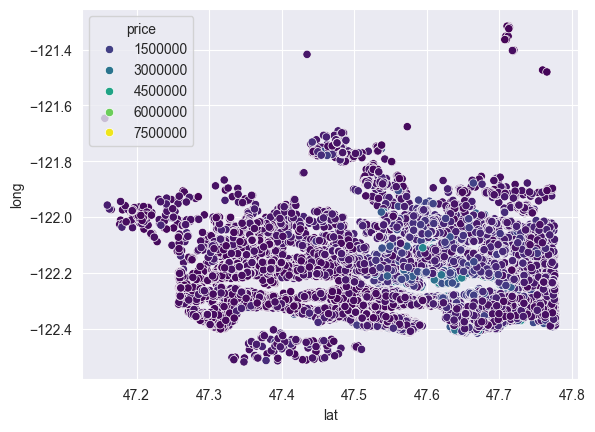

In [14]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="price", palette="viridis", alpha=1)

<Axes: xlabel='lat', ylabel='long'>

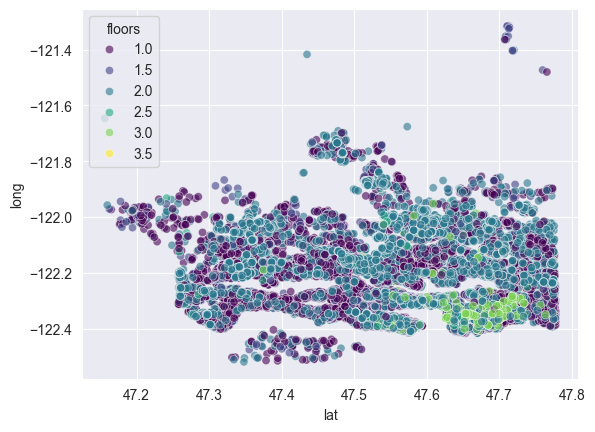

In [15]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="floors", palette="viridis", alpha=0.6)

<Axes: xlabel='lat', ylabel='long'>

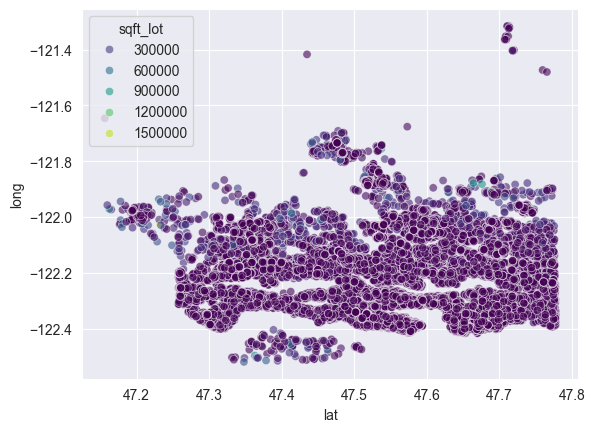

In [16]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="sqft_lot", palette="viridis", alpha=0.6)

In [17]:
df = df.with_columns(pl.Series(name="lat_long", values=KMeans(n_clusters=5).fit_predict(
    df[["lat", "long", "bedrooms", "bathrooms","price"]].to_numpy())))

<Axes: xlabel='lat', ylabel='long'>

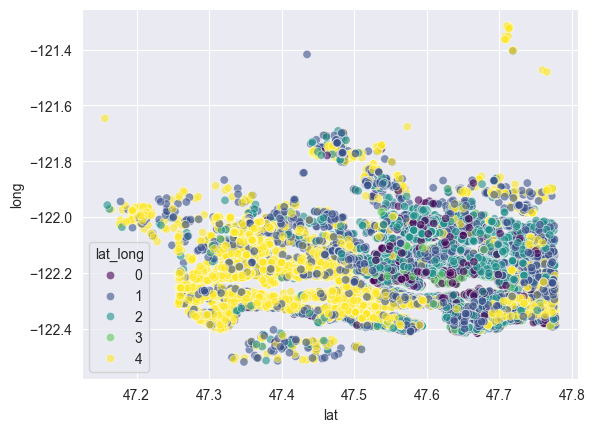

In [18]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="lat_long", palette="viridis", alpha=0.6)

In [19]:
df.head()

shape: (5, 25)
┌────────────┬──────────┬──────────┬───────────┬───┬─────┬───────────┬───────────────┬──────────┐
│ date       ┆ price    ┆ bedrooms ┆ bathrooms ┆ … ┆ age ┆ renovated ┆ zipcode_group ┆ lat_long │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ --- ┆ ---       ┆ ---           ┆ ---      │
│ date       ┆ f64      ┆ i64      ┆ f64       ┆   ┆ i64 ┆ i32       ┆ f64           ┆ i32      │
╞════════════╪══════════╪══════════╪═══════════╪═══╪═════╪═══════════╪═══════════════╪══════════╡
│ 2014-10-13 ┆ 221900.0 ┆ 3        ┆ 1.0       ┆ … ┆ 59  ┆ 0         ┆ 278277.0      ┆ 4        │
│ 2014-12-09 ┆ 538000.0 ┆ 3        ┆ 2.25      ┆ … ┆ 63  ┆ 1         ┆ 425000.0      ┆ 1        │
│ 2015-02-25 ┆ 180000.0 ┆ 2        ┆ 1.0       ┆ … ┆ 82  ┆ 0         ┆ 445000.0      ┆ 4        │
│ 2014-12-09 ┆ 604000.0 ┆ 4        ┆ 3.0       ┆ … ┆ 49  ┆ 0         ┆ 489950.0      ┆ 1        │
│ 2015-02-18 ┆ 510000.0 ┆ 3        ┆ 2.0       ┆ … ┆ 28  ┆ 0         ┆ 642000.0      ┆ 1        │
└────────────┴──────────┴──────────┴───────────┴───┴─────┴───────────┴───────────────┴──────────┘

<Axes: >

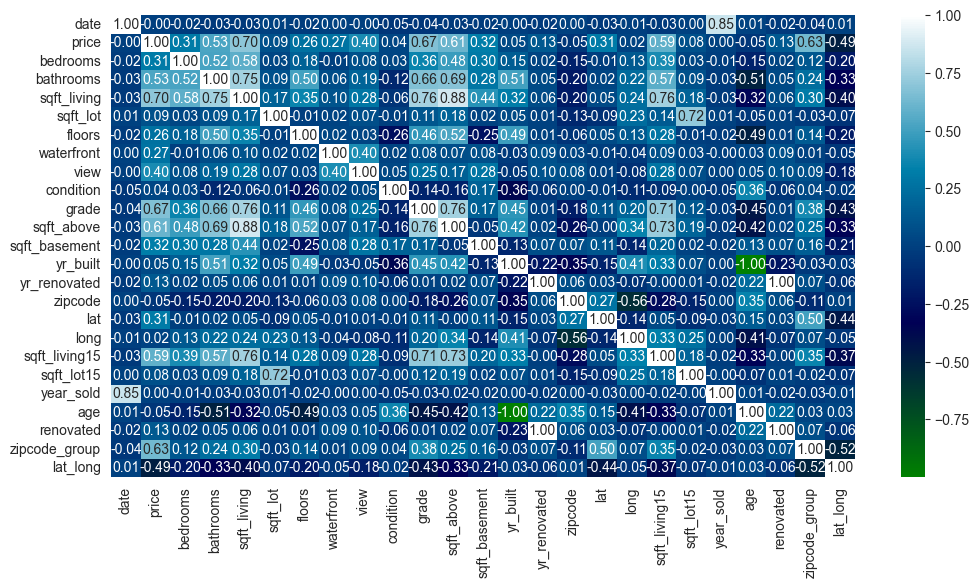

In [20]:
plt.figure(figsize=(12, 6))
correlation: DataFrame = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="ocean", annot=True,
            fmt=".2f")

<Axes: >

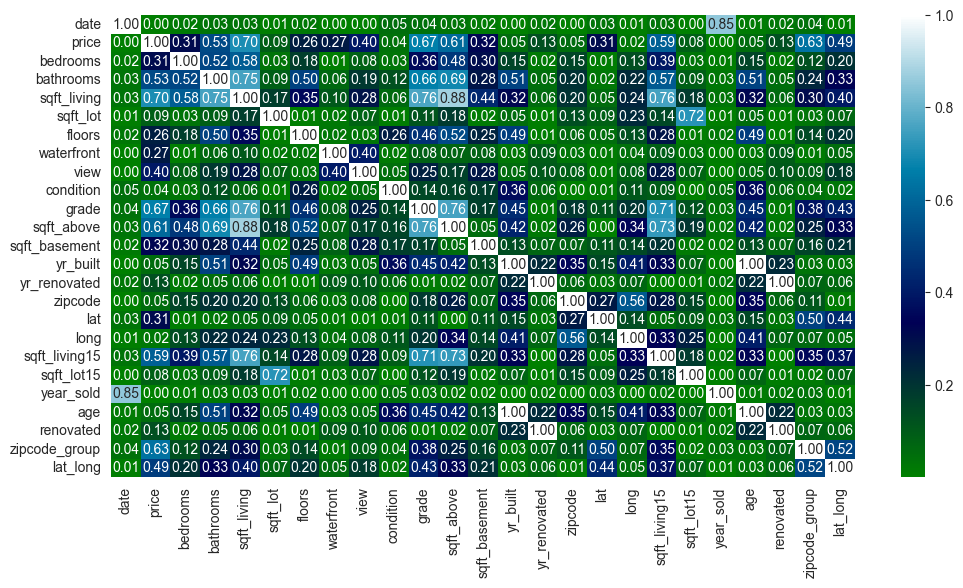

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(abs(correlation.to_numpy()),
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="ocean",
            annot=True,
            fmt=".2f")

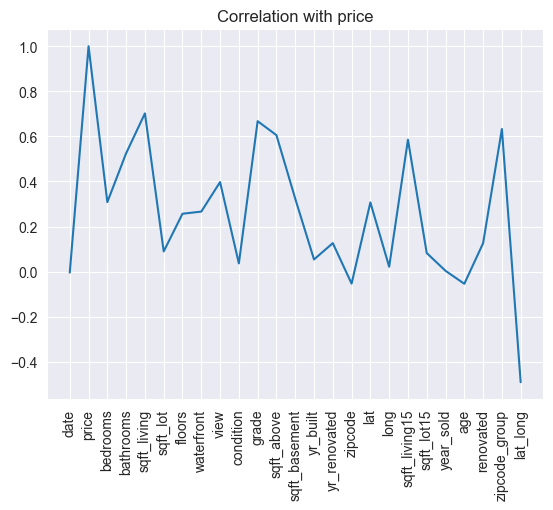

In [22]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

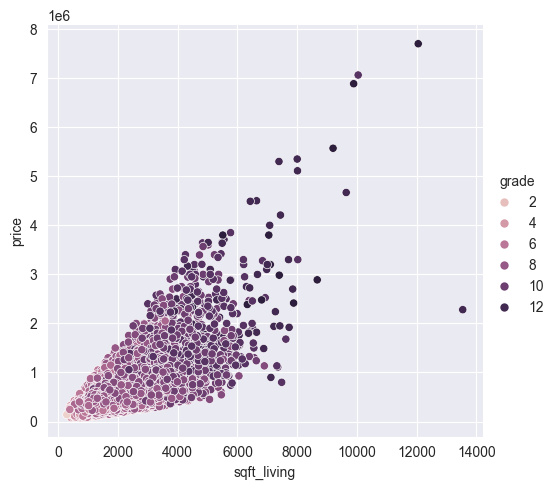

In [23]:
sns.relplot(df, x="sqft_living", y="price", hue="grade")

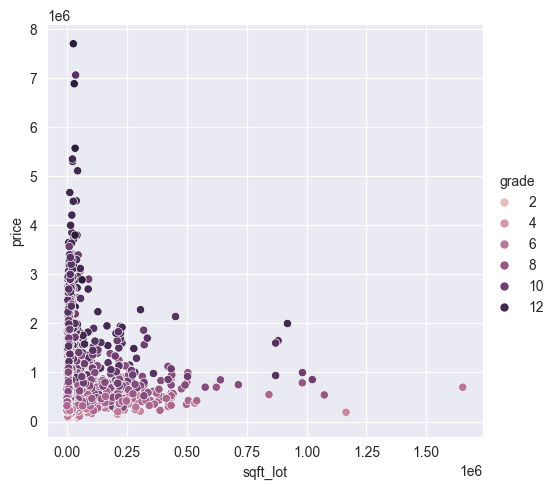

In [24]:
sns.relplot(df, x="sqft_lot", y="price", hue="grade")

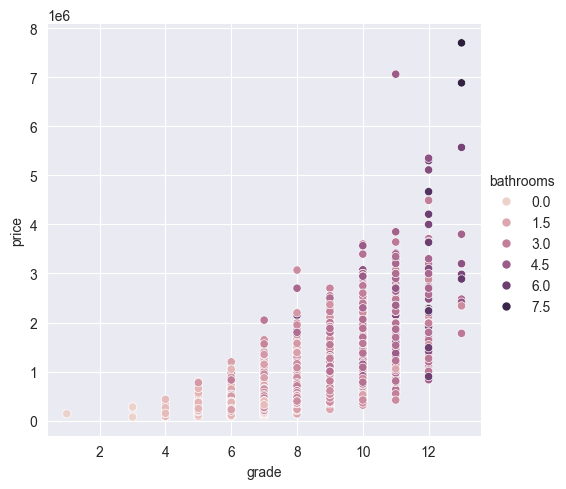

In [25]:
sns.relplot(df, x="grade", y="price", hue="bathrooms")

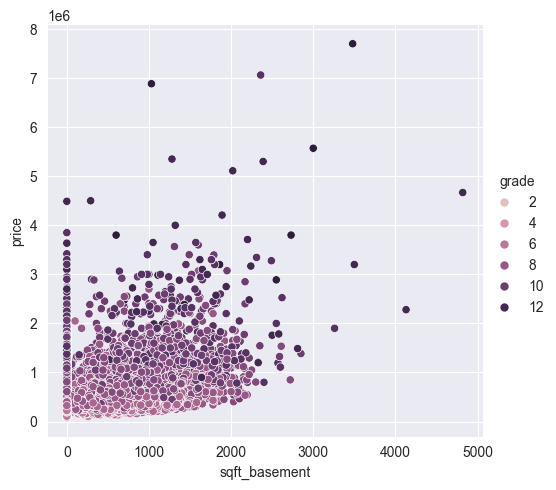

In [26]:
sns.relplot(df, x="sqft_basement", y="price", hue="grade")

In [27]:
# Find the row corresponding to 'price'
price_corr = correlation["price"]
mask = abs(price_corr) > 0.2
columns = [correlation.columns[i] for i, m in enumerate(mask) if m]
columns.remove("price")
columns.remove("lat")
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'zipcode_group',
 'lat_long']

In [28]:
type(df.columns)
a: list = [1, 2, 3, 4, 5]
a.index(3)

2

In [29]:
column_types = df.dtypes
print(type(column_types))
column_types_set = set(column_types)
for col in column_types_set:
    print(col)
    col_types = [df.columns[i] for i, c in enumerate(column_types) if c == col]
    print(col_types)
    print("--")
print(len(column_types))

<class 'list'>
Date
['date']
--
Float64
['price', 'bathrooms', 'floors', 'lat', 'long', 'zipcode_group']
--
Int64
['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'age']
--
Int32
['year_sold', 'renovated', 'lat_long']
--
25


In [30]:
columns_grouped_by_type = {}
for col in columns:
    col_type = column_types[df.columns.index(col)]
    if col_type not in columns_grouped_by_type:
        columns_grouped_by_type[col_type] = []
    columns_grouped_by_type[col_type].append(col)
print(columns_grouped_by_type)

{Int64: ['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15'], Float64: ['bathrooms', 'floors', 'zipcode_group'], Int32: ['lat_long']}


## Outlier detection

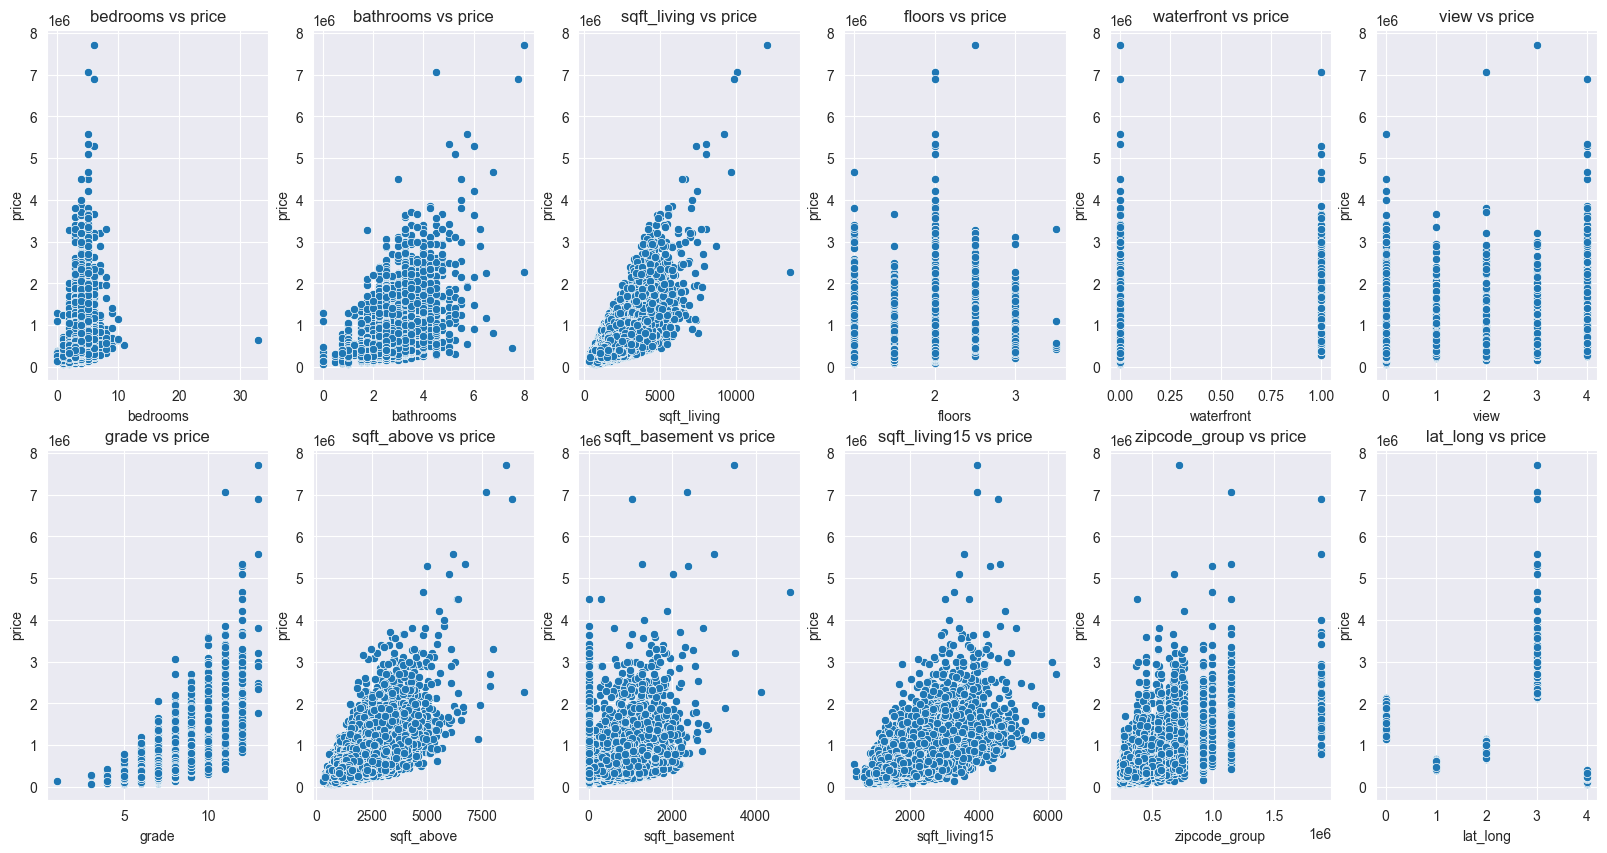

In [31]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
for i, column in enumerate(columns):
    row = int(i / 6)
    col = i % 6
    sns.scatterplot(df, x=column, y="price", ax=axs[row, col])
    axs[row, col].set_title(f"{column} vs price")

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'zipcode_group', 'lat_long']
12


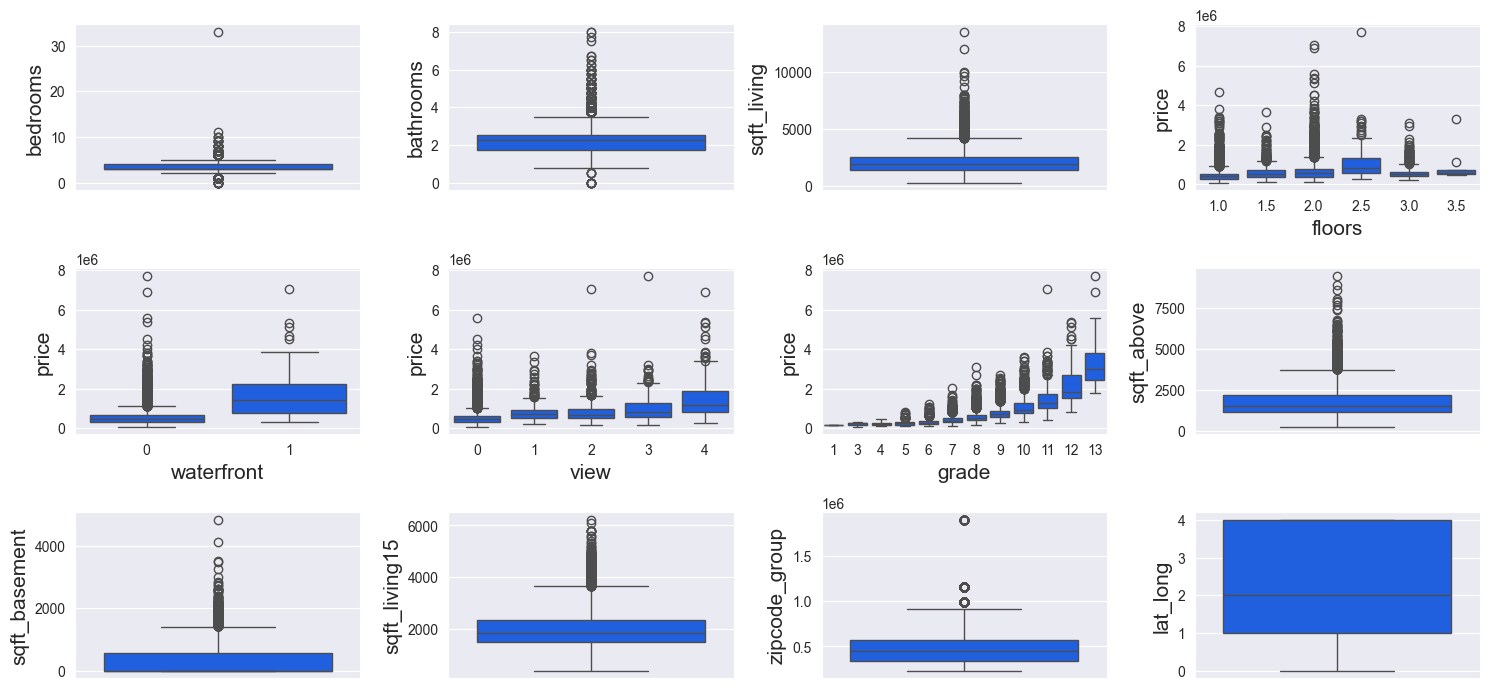

In [32]:
# Convert Polars DataFrame to Pandas DataFrame
# df_pandas = df[columns + ["price"]].to_pandas()

# Set style and custom palette
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']

sns.set_palette(sns.color_palette(colors))

# # Order columns: numerical first, then categorical
# OrderedCols = np.concatenate([
#     df_pandas.select_dtypes(exclude='object').columns.values,
# ])

# Create subplots
fig, ax = plt.subplots(3, 4, figsize=(15, 7), dpi=100)

print(columns)
print(len(columns))

# Iterate over columns
for i, col in enumerate(columns):
    x = i // 4
    y = i % 4

    if col in ["waterfront", "floors", "grade", "view"]:  # Categorical columns
        sns.boxplot(data=df, x=col, y='price', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

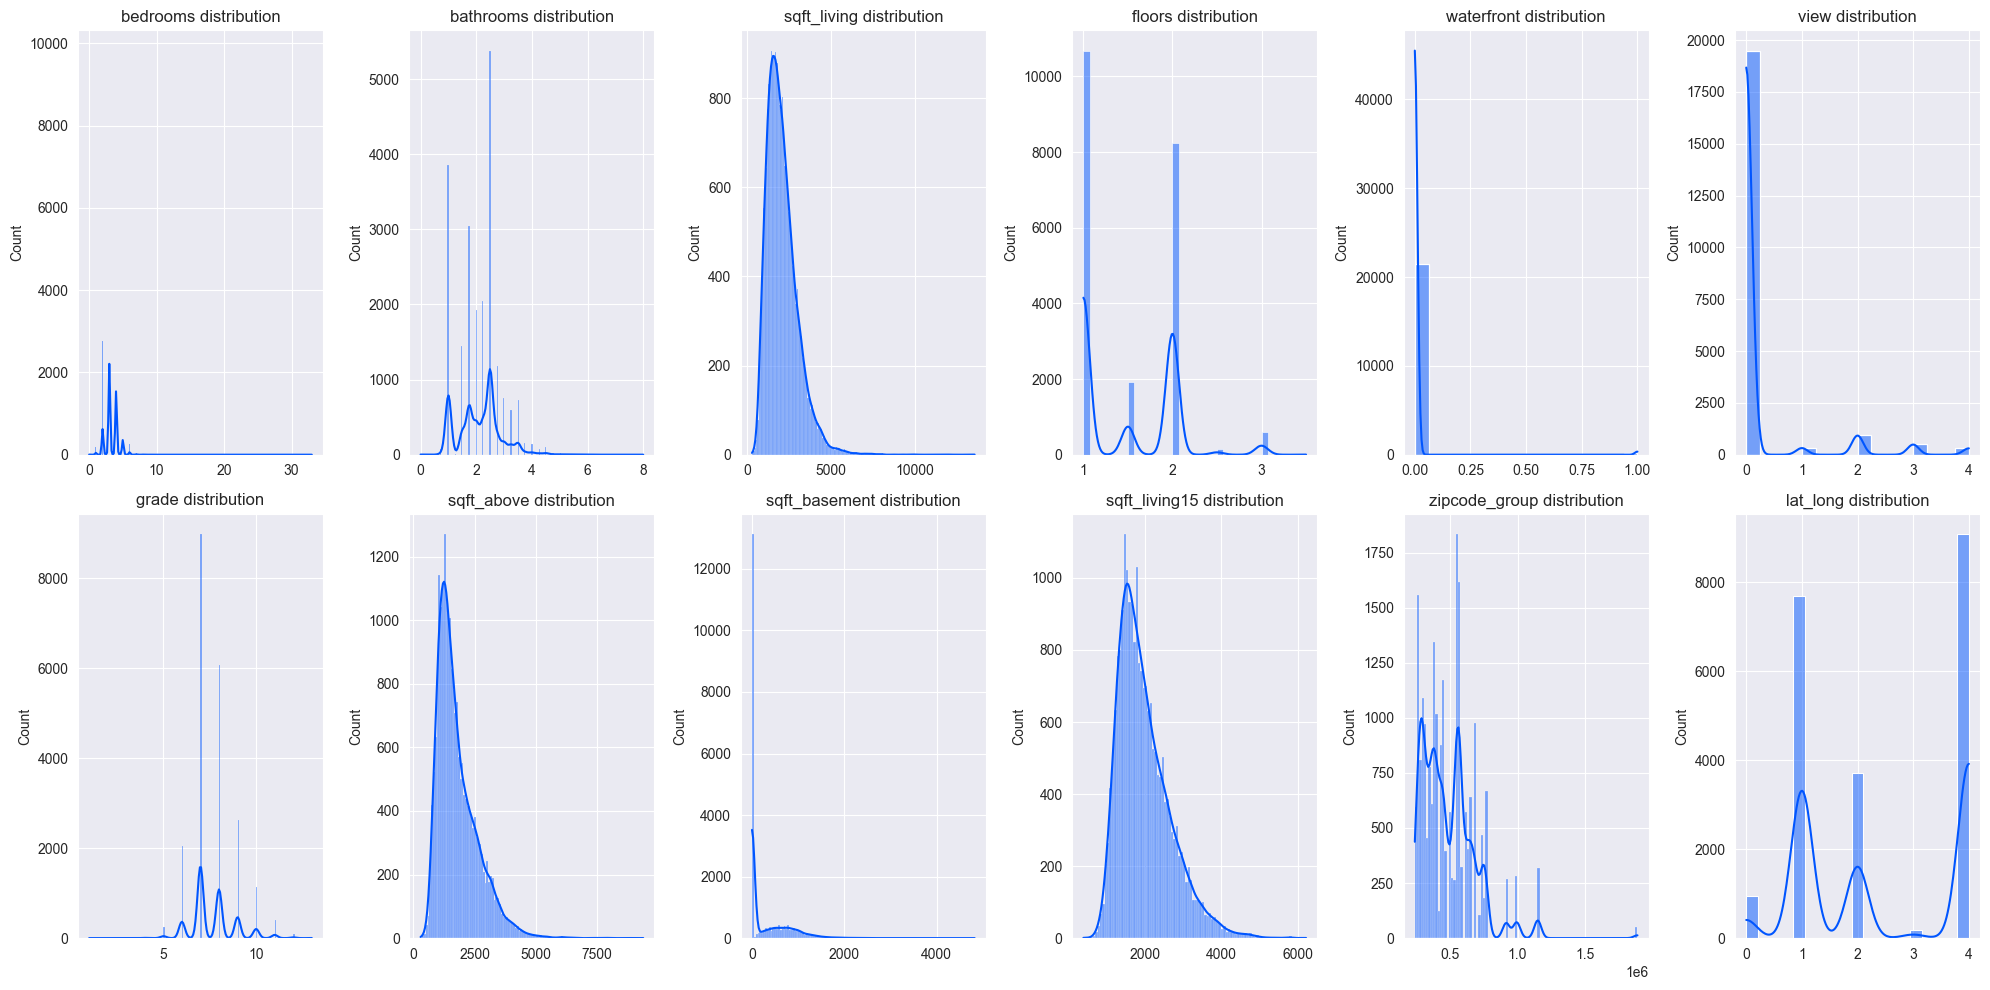

In [33]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
for i, column in enumerate(columns):
    row = int(i / 6)
    col = i % 6
    sns.histplot(df[column], ax=axs[row, col], kde=True)
    axs[row, col].set_title(f"{column} distribution")
plt.tight_layout()

## Prepare data

In [34]:
X = df[columns].to_numpy()
y = df["price"].to_numpy().reshape(-1, 1)

In [35]:
X.shape, y.shape

((21613, 12), (21613, 1))

## Split train and test data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the model

In [37]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [38]:
model.coef_, model.intercept_

(array([[-2.53467815e+04, -4.63736383e+03,  5.33479555e+01,
         -2.46064349e+04,  5.56552089e+05,  7.32014315e+04,
          5.15912005e+04,  1.51827466e+02,  1.34984498e+02,
         -4.74416230e+01,  8.23082929e-01, -4.17226604e+03]]),
 array([-462170.83148337]))

## Evaluate the model

In [39]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 108394.38172937046 MSE: 28844021327.9333 RMSE: 169835.2770420012 R^2 0.7756605608260984


## Visualize your result

Text(0, 0.5, 'y-actual')

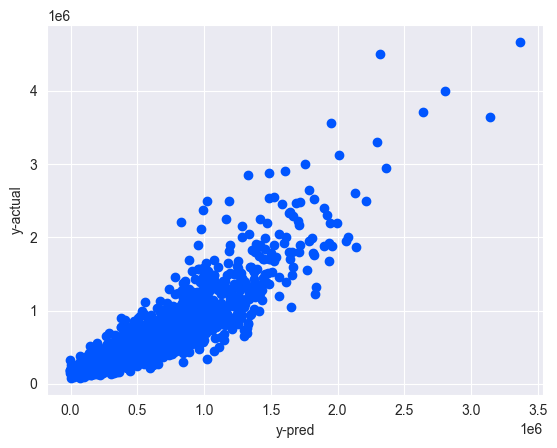

In [40]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')

## Loading data

In [41]:
load_data("shivachandel/kc-house-data", "../Data")
df = pl.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


## Data exploration

In [42]:
df.head()

shape: (5, 21)
┌────────────┬────────────┬──────────┬──────────┬───┬─────────┬──────────┬────────────┬────────────┐
│ id         ┆ date       ┆ price    ┆ bedrooms ┆ … ┆ lat     ┆ long     ┆ sqft_livin ┆ sqft_lot15 │
│ ---        ┆ ---        ┆ ---      ┆ ---      ┆   ┆ ---     ┆ ---      ┆ g15        ┆ ---        │
│ i64        ┆ str        ┆ f64      ┆ i64      ┆   ┆ f64     ┆ f64      ┆ ---        ┆ i64        │
│            ┆            ┆          ┆          ┆   ┆         ┆          ┆ i64        ┆            │
╞════════════╪════════════╪══════════╪══════════╪═══╪═════════╪══════════╪════════════╪════════════╡
│ 7129300520 ┆ 20141013T0 ┆ 221900.0 ┆ 3        ┆ … ┆ 47.5112 ┆ -122.257 ┆ 1340       ┆ 5650       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 6414100192 ┆ 20141209T0 ┆ 538000.0 ┆ 3        ┆ … ┆ 47.721  ┆ -122.319 ┆ 1690       ┆ 7639       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 5631500400 ┆ 20150225T0 ┆ 180000.0 ┆ 2        ┆ … ┆ 47.7379 ┆ -122.233 ┆ 2720       ┆ 8062       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 2487200875 ┆ 20141209T0 ┆ 604000.0 ┆ 4        ┆ … ┆ 47.5208 ┆ -122.393 ┆ 1360       ┆ 5000       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
│ 1954400510 ┆ 20150218T0 ┆ 510000.0 ┆ 3        ┆ … ┆ 47.6168 ┆ -122.045 ┆ 1800       ┆ 7503       │
│            ┆ 00000      ┆          ┆          ┆   ┆         ┆          ┆            ┆            │
└────────────┴────────────┴──────────┴──────────┴───┴─────────┴──────────┴────────────┴────────────┘

In [43]:
df.describe()

shape: (9, 22)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ id        ┆ date      ┆ price     ┆ … ┆ lat       ┆ long      ┆ sqft_livi ┆ sqft_lot │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ng15      ┆ 15       │
│ str       ┆ f64       ┆ str       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 21613.0   ┆ 21613     ┆ 21613.0   ┆ … ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   ┆ 21613.0  │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 4.5803e9  ┆ null      ┆ 540088.14 ┆ … ┆ 47.560053 ┆ -122.2138 ┆ 1986.5524 ┆ 12768.45 │
│           ┆           ┆           ┆ 1767      ┆   ┆           ┆ 96        ┆ 92        ┆ 5652     │
│ std       ┆ 2.8766e9  ┆ null      ┆ 367127.19 ┆ … ┆ 0.138564  ┆ 0.140828  ┆ 685.39130 ┆ 27304.17 │
│           ┆           ┆           ┆ 6483      ┆   ┆           ┆           ┆ 4         ┆ 9631     │
│ min       ┆ 1.000102e ┆ 20140502T ┆ 75000.0   ┆ … ┆ 47.1559   ┆ -122.519  ┆ 399.0     ┆ 651.0    │
│           ┆ 6         ┆ 000000    ┆           ┆   ┆           ┆           ┆           ┆          │
│ 25%       ┆ 2.1230e9  ┆ null      ┆ 321950.0  ┆ … ┆ 47.471    ┆ -122.328  ┆ 1490.0    ┆ 5100.0   │
│ 50%       ┆ 3.9049e9  ┆ null      ┆ 450000.0  ┆ … ┆ 47.5718   ┆ -122.23   ┆ 1840.0    ┆ 7620.0   │
│ 75%       ┆ 7.3089e9  ┆ null      ┆ 645000.0  ┆ … ┆ 47.678    ┆ -122.125  ┆ 2360.0    ┆ 10083.0  │
│ max       ┆ 9.9000e9  ┆ 20150527T ┆ 7.7e6     ┆ … ┆ 47.7776   ┆ -121.315  ┆ 6210.0    ┆ 871200.0 │
│           ┆           ┆ 000000    ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [44]:
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y%m%dT%H%M%S"))
df = df.with_columns(pl.col("sqft_above").fill_null(strategy="mean"))

In [45]:
df.head()

shape: (5, 21)
┌────────────┬────────────┬──────────┬──────────┬───┬─────────┬──────────┬────────────┬────────────┐
│ id         ┆ date       ┆ price    ┆ bedrooms ┆ … ┆ lat     ┆ long     ┆ sqft_livin ┆ sqft_lot15 │
│ ---        ┆ ---        ┆ ---      ┆ ---      ┆   ┆ ---     ┆ ---      ┆ g15        ┆ ---        │
│ i64        ┆ date       ┆ f64      ┆ i64      ┆   ┆ f64     ┆ f64      ┆ ---        ┆ i64        │
│            ┆            ┆          ┆          ┆   ┆         ┆          ┆ i64        ┆            │
╞════════════╪════════════╪══════════╪══════════╪═══╪═════════╪══════════╪════════════╪════════════╡
│ 7129300520 ┆ 2014-10-13 ┆ 221900.0 ┆ 3        ┆ … ┆ 47.5112 ┆ -122.257 ┆ 1340       ┆ 5650       │
│ 6414100192 ┆ 2014-12-09 ┆ 538000.0 ┆ 3        ┆ … ┆ 47.721  ┆ -122.319 ┆ 1690       ┆ 7639       │
│ 5631500400 ┆ 2015-02-25 ┆ 180000.0 ┆ 2        ┆ … ┆ 47.7379 ┆ -122.233 ┆ 2720       ┆ 8062       │
│ 2487200875 ┆ 2014-12-09 ┆ 604000.0 ┆ 4        ┆ … ┆ 47.5208 ┆ -122.393 ┆ 1360       ┆ 5000       │
│ 1954400510 ┆ 2015-02-18 ┆ 510000.0 ┆ 3        ┆ … ┆ 47.6168 ┆ -122.045 ┆ 1800       ┆ 7503       │
└────────────┴────────────┴──────────┴──────────┴───┴─────────┴──────────┴────────────┴────────────┘

In [46]:
df = df.drop(["id"])
df.describe()

shape: (9, 21)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ statistic ┆ date      ┆ price     ┆ bedrooms ┆ … ┆ lat       ┆ long      ┆ sqft_livi ┆ sqft_lot1 │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ng15      ┆ 5         │
│ str       ┆ str       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---       │
│           ┆           ┆           ┆          ┆   ┆           ┆           ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 21613     ┆ 21613.0   ┆ 21613.0  ┆ … ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   ┆ 21613.0   │
│ null_coun ┆ 0         ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ mean      ┆ 2014-10-2 ┆ 540088.14 ┆ 3.370842 ┆ … ┆ 47.560053 ┆ -122.2138 ┆ 1986.5524 ┆ 12768.455 │
│           ┆ 9 04:38:0 ┆ 1767      ┆          ┆   ┆           ┆ 96        ┆ 92        ┆ 652       │
│           ┆ 1.959000  ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ std       ┆ null      ┆ 367127.19 ┆ 0.930062 ┆ … ┆ 0.138564  ┆ 0.140828  ┆ 685.39130 ┆ 27304.179 │
│           ┆           ┆ 6483      ┆          ┆   ┆           ┆           ┆ 4         ┆ 631       │
│ min       ┆ 2014-05-0 ┆ 75000.0   ┆ 0.0      ┆ … ┆ 47.1559   ┆ -122.519  ┆ 399.0     ┆ 651.0     │
│           ┆ 2         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 25%       ┆ 2014-07-2 ┆ 321950.0  ┆ 3.0      ┆ … ┆ 47.471    ┆ -122.328  ┆ 1490.0    ┆ 5100.0    │
│           ┆ 2         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 50%       ┆ 2014-10-1 ┆ 450000.0  ┆ 3.0      ┆ … ┆ 47.5718   ┆ -122.23   ┆ 1840.0    ┆ 7620.0    │
│           ┆ 6         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ 75%       ┆ 2015-02-1 ┆ 645000.0  ┆ 4.0      ┆ … ┆ 47.678    ┆ -122.125  ┆ 2360.0    ┆ 10083.0   │
│           ┆ 7         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
│ max       ┆ 2015-05-2 ┆ 7.7e6     ┆ 33.0     ┆ … ┆ 47.7776   ┆ -121.315  ┆ 6210.0    ┆ 871200.0  │
│           ┆ 7         ┆           ┆          ┆   ┆           ┆           ┆           ┆           │
└───────────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [47]:
df.null_count()

shape: (1, 20)
┌──────┬───────┬──────────┬───────────┬───┬─────┬──────┬───────────────┬────────────┐
│ date ┆ price ┆ bedrooms ┆ bathrooms ┆ … ┆ lat ┆ long ┆ sqft_living15 ┆ sqft_lot15 │
│ ---  ┆ ---   ┆ ---      ┆ ---       ┆   ┆ --- ┆ ---  ┆ ---           ┆ ---        │
│ u32  ┆ u32   ┆ u32      ┆ u32       ┆   ┆ u32 ┆ u32  ┆ u32           ┆ u32        │
╞══════╪═══════╪══════════╪═══════════╪═══╪═════╪══════╪═══════════════╪════════════╡
│ 0    ┆ 0     ┆ 0        ┆ 0         ┆ … ┆ 0   ┆ 0    ┆ 0             ┆ 0          │
└──────┴───────┴──────────┴───────────┴───┴─────┴──────┴───────────────┴────────────┘

In [48]:
df = df.with_columns(
    pl.col("date").dt.year().alias("year_sold")
)

In [49]:
df = df.with_columns(
    pl.when(pl.col("year_sold") - pl.col("yr_built") > 0)
    .then(pl.col("year_sold") - pl.col("yr_built"))
    .otherwise(0)
    .alias("age")
)

In [50]:
df = df.with_columns(
    pl.when(pl.col("yr_renovated") > 0)
    .then(1)
    .otherwise(0)
    .alias("renovated")
)

In [51]:
zipcode_median = df.group_by("zipcode").agg(pl.col("price").median().alias("zipcode_group"))
zipcode_median

shape: (70, 2)
┌─────────┬───────────────┐
│ zipcode ┆ zipcode_group │
│ ---     ┆ ---           │
│ i64     ┆ f64           │
╞═════════╪═══════════════╡
│ 98188   ┆ 264000.0      │
│ 98075   ┆ 739999.0      │
│ 98072   ┆ 515000.0      │
│ 98010   ┆ 359999.5      │
│ 98105   ┆ 675000.0      │
│ …       ┆ …             │
│ 98027   ┆ 570500.0      │
│ 98039   ┆ 1.8925e6      │
│ 98024   ┆ 460000.0      │
│ 98045   ┆ 399500.0      │
│ 98006   ┆ 760184.5      │
└─────────┴───────────────┘

In [52]:
print(zipcode_median.n_unique(),df["zipcode"].n_unique())

70 70


In [53]:
df = df.join(zipcode_median, on="zipcode", how="left")

In [54]:
df = df.with_columns(pl.Series(name="zipcode_group", values=KMeans(n_clusters=3).fit_predict(
    df[["zipcode_group", "zipcode"]].to_numpy())))
print(df["zipcode_group"].n_unique(),df["zipcode"].n_unique())

3 70


<Axes: xlabel='lat', ylabel='long'>

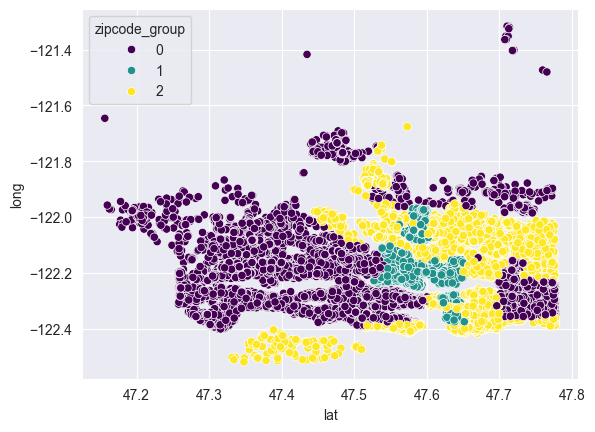

In [55]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="zipcode_group", palette="viridis", alpha=1)

<Axes: xlabel='lat', ylabel='long'>

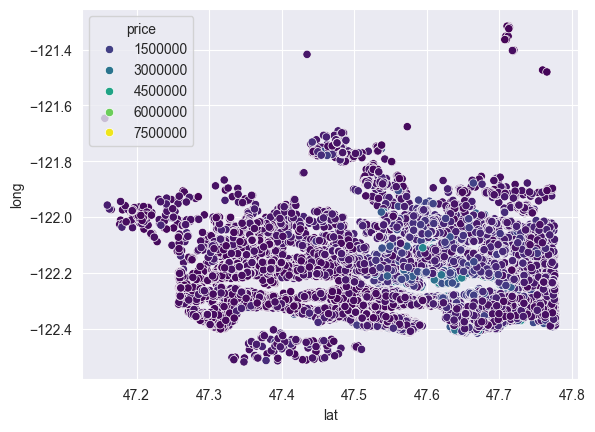

In [56]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="price", palette="viridis", alpha=1)

<Axes: xlabel='lat', ylabel='long'>

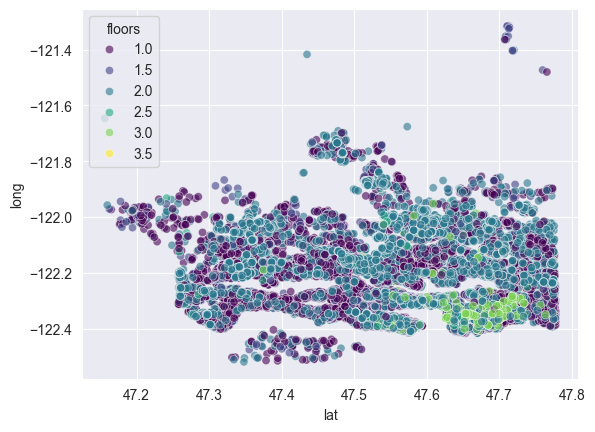

In [57]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="floors", palette="viridis", alpha=0.6)

<Axes: xlabel='lat', ylabel='long'>

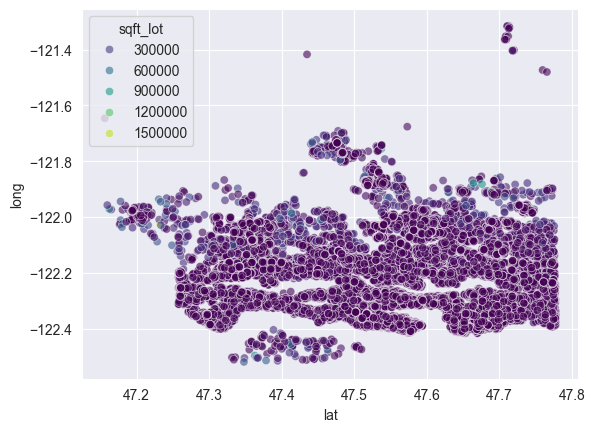

In [58]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="sqft_lot", palette="viridis", alpha=0.6)

<Axes: xlabel='lat', ylabel='long'>

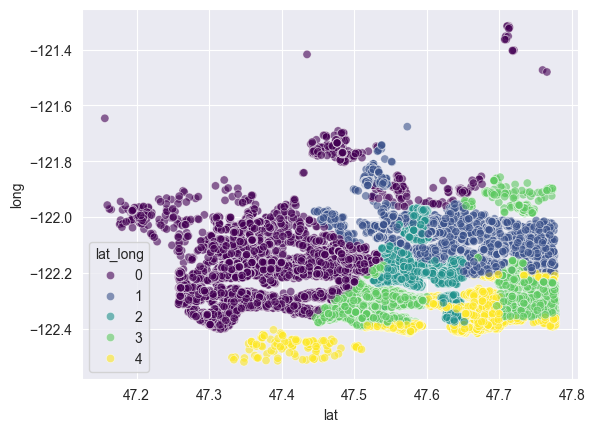

In [59]:
df = df.with_columns(pl.Series(name="lat_long", values=KMeans(n_clusters=5).fit_predict(
    df[["lat", "long","zipcode_group"]].to_numpy())))
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="lat_long", palette="viridis", alpha=0.6)

In [60]:
df.head()

shape: (5, 25)
┌────────────┬──────────┬──────────┬───────────┬───┬─────┬───────────┬───────────────┬──────────┐
│ date       ┆ price    ┆ bedrooms ┆ bathrooms ┆ … ┆ age ┆ renovated ┆ zipcode_group ┆ lat_long │
│ ---        ┆ ---      ┆ ---      ┆ ---       ┆   ┆ --- ┆ ---       ┆ ---           ┆ ---      │
│ date       ┆ f64      ┆ i64      ┆ f64       ┆   ┆ i64 ┆ i32       ┆ i32           ┆ i32      │
╞════════════╪══════════╪══════════╪═══════════╪═══╪═════╪═══════════╪═══════════════╪══════════╡
│ 2014-10-13 ┆ 221900.0 ┆ 3        ┆ 1.0       ┆ … ┆ 59  ┆ 0         ┆ 0             ┆ 3        │
│ 2014-12-09 ┆ 538000.0 ┆ 3        ┆ 2.25      ┆ … ┆ 63  ┆ 1         ┆ 0             ┆ 3        │
│ 2015-02-25 ┆ 180000.0 ┆ 2        ┆ 1.0       ┆ … ┆ 82  ┆ 0         ┆ 0             ┆ 3        │
│ 2014-12-09 ┆ 604000.0 ┆ 4        ┆ 3.0       ┆ … ┆ 49  ┆ 0         ┆ 2             ┆ 4        │
│ 2015-02-18 ┆ 510000.0 ┆ 3        ┆ 2.0       ┆ … ┆ 28  ┆ 0         ┆ 2             ┆ 1        │
└────────────┴──────────┴──────────┴───────────┴───┴─────┴───────────┴───────────────┴──────────┘

<Axes: >

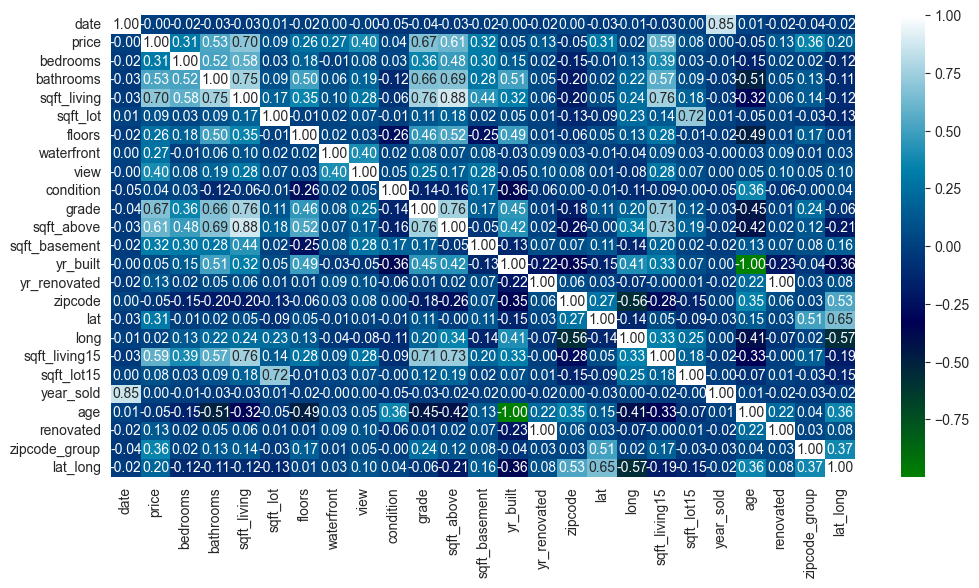

In [61]:
plt.figure(figsize=(12, 6))
correlation: DataFrame = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="ocean", annot=True,
            fmt=".2f")

<Axes: >

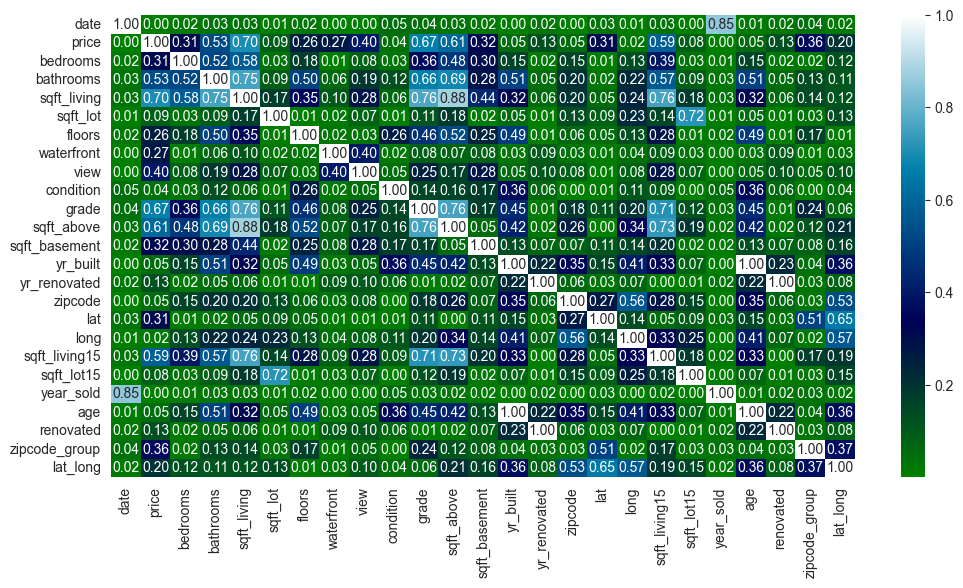

In [63]:
plt.figure(figsize=(12, 6))
sns.heatmap(abs(correlation.to_numpy()),
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="ocean",
            annot=True,
            fmt=".2f")

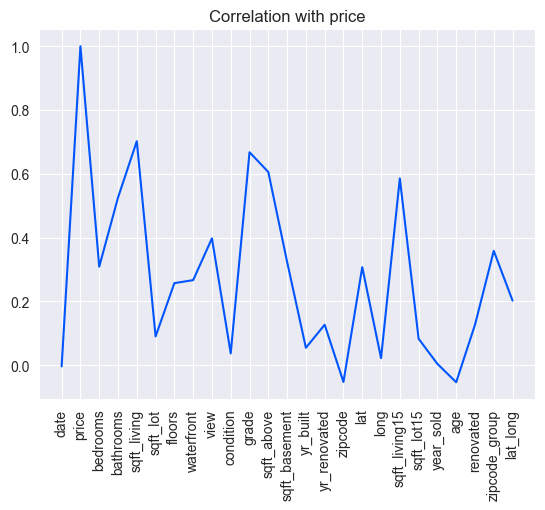

In [64]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

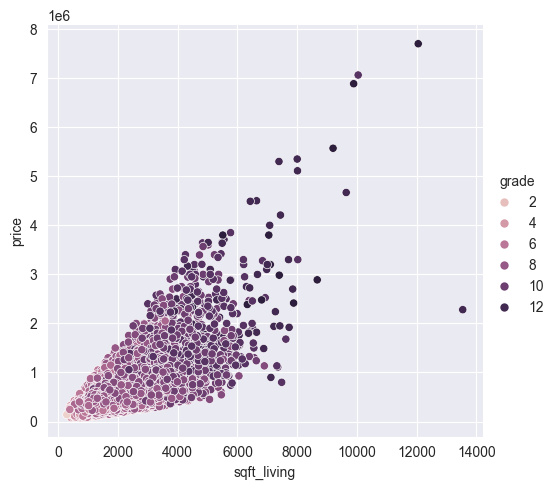

In [65]:
sns.relplot(df, x="sqft_living", y="price", hue="grade")

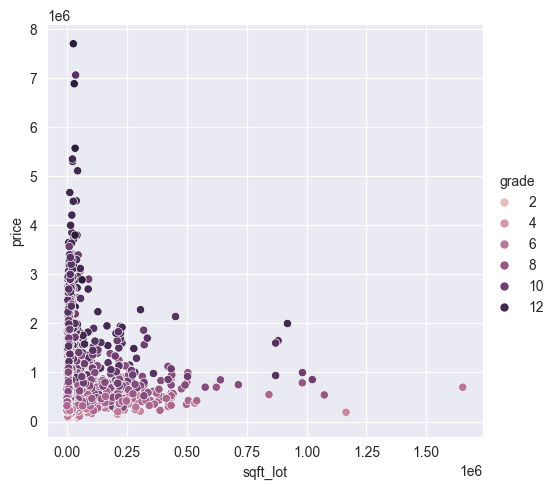

In [66]:
sns.relplot(df, x="sqft_lot", y="price", hue="grade")

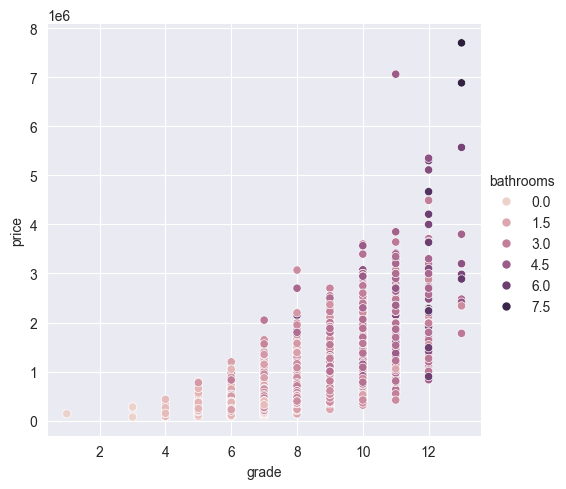

In [67]:
sns.relplot(df, x="grade", y="price", hue="bathrooms")

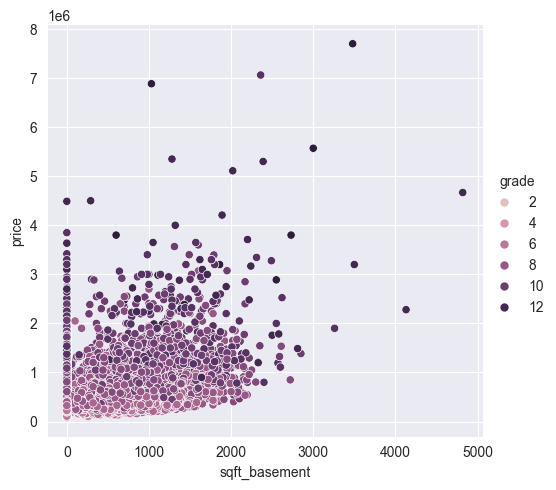

In [68]:
sns.relplot(df, x="sqft_basement", y="price", hue="grade")

In [69]:
# Find the row corresponding to 'price'
price_corr = correlation["price"]
mask = abs(price_corr) > 0.2
columns = [correlation.columns[i] for i, m in enumerate(mask) if m]
columns.remove("price")
columns.remove("lat")
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'zipcode_group',
 'lat_long']

In [71]:
column_types = df.dtypes
print(type(column_types))
column_types_set = set(column_types)
for col in column_types_set:
    print(col)
    col_types = [df.columns[i] for i, c in enumerate(column_types) if c == col]
    print(col_types)
    print("--")
print(len(column_types))

<class 'list'>
Date
['date']
--
Float64
['price', 'bathrooms', 'floors', 'lat', 'long']
--
Int64
['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'age']
--
Int32
['year_sold', 'renovated', 'zipcode_group', 'lat_long']
--
25


In [72]:
columns_grouped_by_type = {}
for col in columns:
    col_type = column_types[df.columns.index(col)]
    if col_type not in columns_grouped_by_type:
        columns_grouped_by_type[col_type] = []
    columns_grouped_by_type[col_type].append(col)
print(columns_grouped_by_type)

{Int64: ['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15'], Float64: ['bathrooms', 'floors'], Int32: ['zipcode_group', 'lat_long']}


## Outlier detection

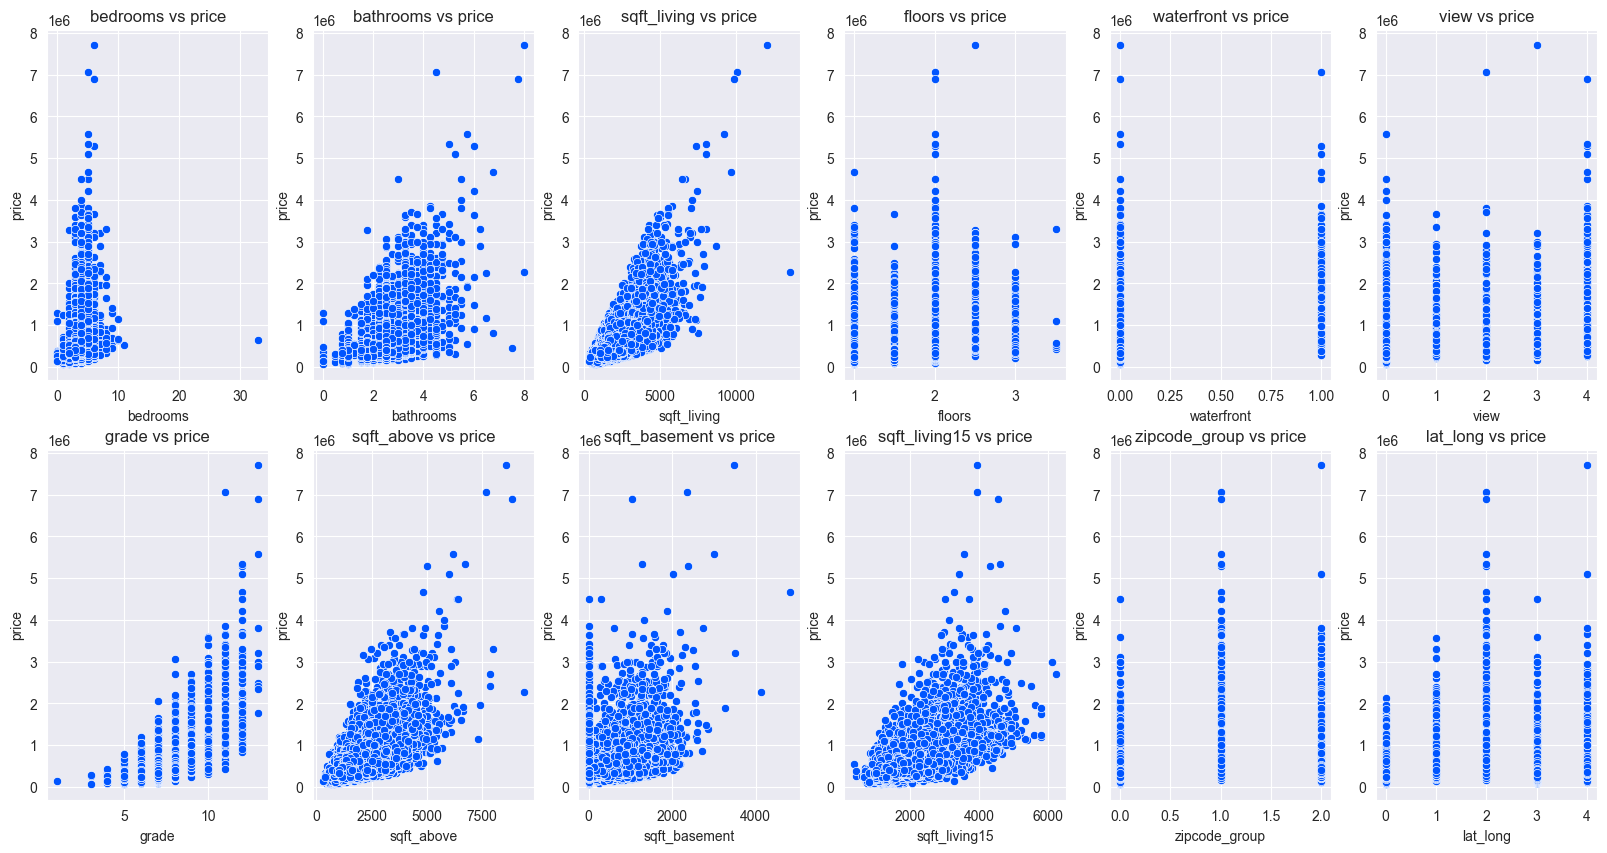

In [73]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
for i, column in enumerate(columns):
    row = int(i/6)
    col = i % 6
    sns.scatterplot(df, x=column, y="price", ax=axs[row, col])
    axs[row, col].set_title(f"{column} vs price")

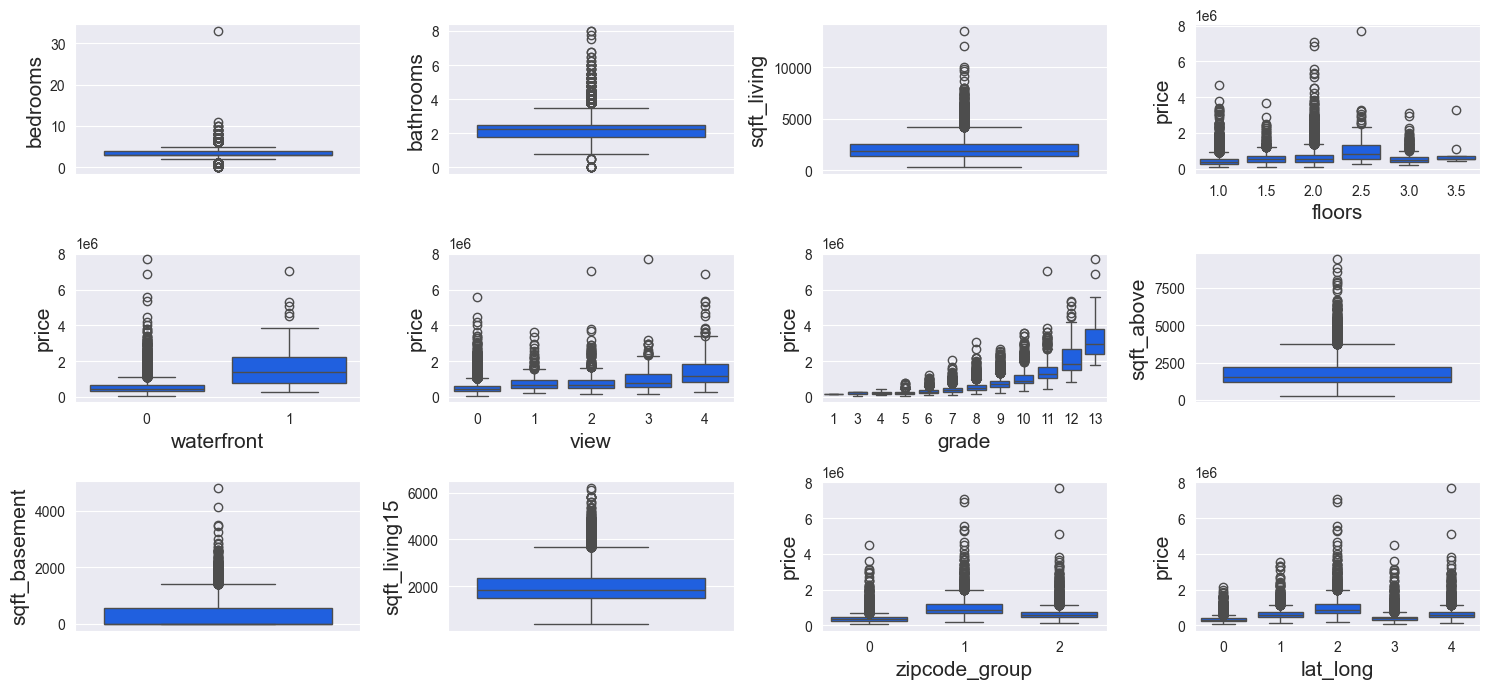

In [74]:
# Set style and custom palette
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']

sns.set_palette(sns.color_palette(colors))

# Create subplots
fig, ax = plt.subplots(3, 4, figsize=(15, 7), dpi=100)

# Iterate over columns
for i, col in enumerate(columns):
    x = i // 4
    y = i % 4

    if col in ["waterfront", "floors", "grade", "view","zipcode_group","lat_long"]:  # Categorical columns
        sns.boxplot(data=df, x=col, y='price', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

12


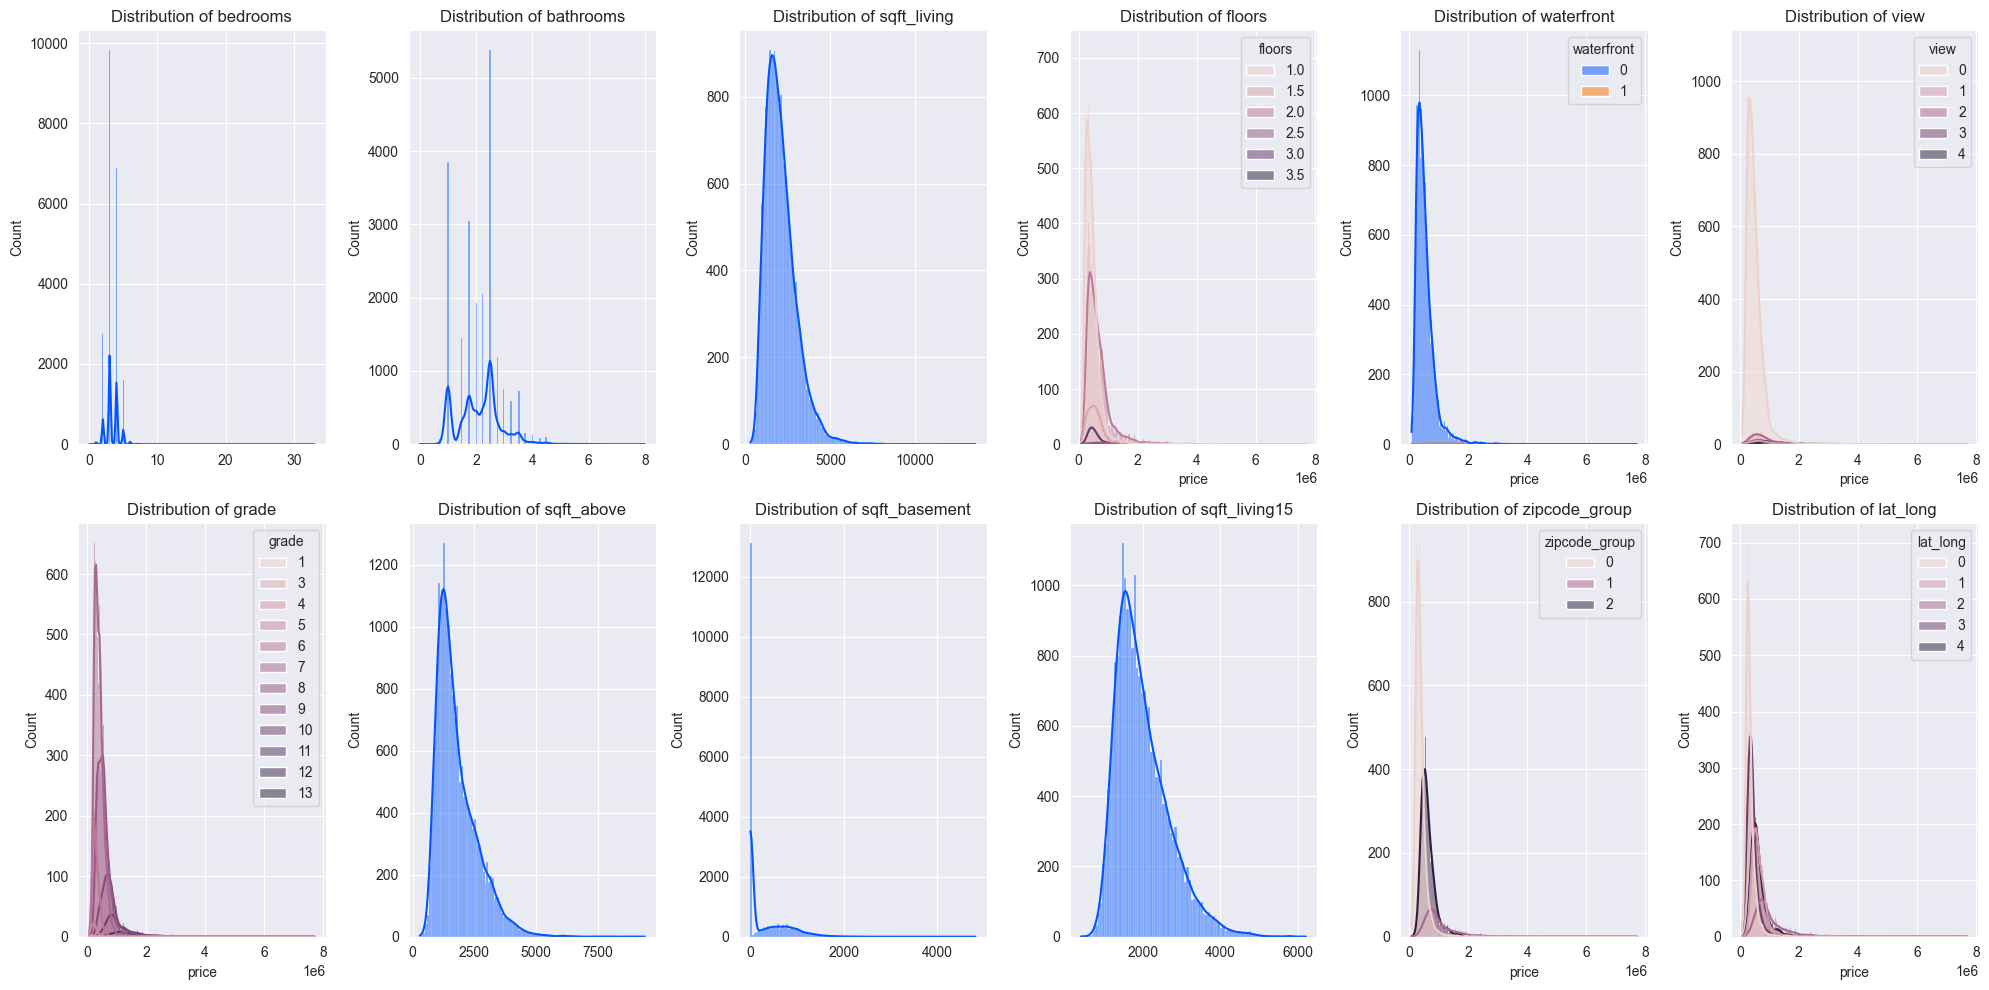

In [76]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
print(len(columns))
for i, column in enumerate(columns):
    row = int(i/6)
    col = i % 6
    if column in ["waterfront", "floors", "grade", "view","zipcode_group","lat_long"]:  # Categorical columns
        sns.histplot(df, ax=axs[row, col], hue=column, x='price', kde=True)
    else:
        sns.histplot(df[column], ax=axs[row, col], kde=True)
    axs[row, col].set_title(f"Distribution of {column}")
plt.tight_layout()

## Prepare data

In [ ]:
X = df[columns].to_numpy()
y = df["price"].to_numpy().reshape(-1, 1)

In [ ]:
X.shape, y.shape

## Split train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the model

In [ ]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [ ]:
model.coef_, model.intercept_

## Evaluate the model

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

## Visualize your result

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')